In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [5]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

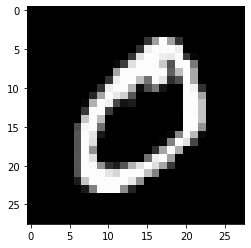

In [8]:
single_image = np.array(pixel_values.iloc[1, :]).reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [10]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transform_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

d:\software\anaconda\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\software\anaconda\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
tsne_df = pd.DataFrame(
    np.column_stack((transform_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

<ipython-input-11-1d0b42c0937a>:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [12]:
tsne_df.head(10)

,x,y,targets
0,31.722771,-16.391663,5
1,10.612940,-67.804901,0
2,49.593014,38.388294,4
3,-37.814510,32.660255,1
4,22.104887,31.574816,9
5,-20.023834,5.170237,2
6,-58.184368,-9.584998,1
7,23.328159,-14.326128,3
8,-53.283909,-5.448031,1
9,2.919093,30.534452,4


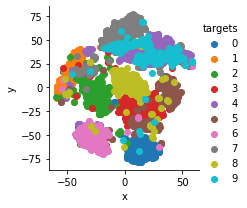

In [15]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()